# 1.  Introduccion

## Problema

 Las enfermedades cardiovasculares (ECV) son la primera causa de muerte en el mundo, y se calcula que cada año se cobran 17,9 millones de vidas, lo que representa el 31% de todas las muertes en el mundo. La insuficiencia cardíaca es una de las causas más frecuentes de ECV. Las personas con enfermedades cardiovasculares o que presentan un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y gestión tempranas en las que un modelo de aprendizaje automático puede ser de gran ayuda. De este modo, tratamos de resolver de forma automatizada otro problema que se presenta en la naturaleza con vistas a contrarrestarlo y centrarnos en el siguiente problema con la ayuda de las técnicas de IA.

## Descripcion de variables

1. *Age*: Edad del paciente [años]
2. *Sex*: sexo del paciente [M: Male, F: Female]
3. *ChestPainType*: Tipo de dolor torácico [AT: Angina típica, ATA: Angina atípica, PAN: Dolor no Anginoso, ASY: Asintomático].
4. *RestingBP*: tensión arterial en reposo [mm Hg]
5. *Cholesterol*: Colesterol Serico[mm/dl]
6. *FastingBS*: glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario].
7. *RestingECG*: resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV), HVI: que muestra hipertrofia ventricular izquierda probable o definida según los criterios de Estes].
8. *MaxHR*: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202].
9. *ExerciseAngina*: Angina inducida por el ejercicio [S: Sí, N: No].
10. *Oldpeak*: oldpeak = ST [Valor numérico medido en depresión].. Se refiere a la diferencia en altura entre el pico de ejercicio y el reposo en un electrocardiograma durante un estudio de esfuerzo. Valores mayores de oldpeak suelen indicar una mayor gravedad de la enfermedad cardíaca isquémica. Clasificacion: Normal: menor de 0.5, Leve: entre 0.5 y 1.0, Moderado: entre 1.0 y 2.0 ,Severo: mayor de 2.0
11. *ST_Slope*: la pendiente del segmento ST de ejercicio máximo [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente].
12. *HeartDisease*: output class [1: heart disease, 0: Normal]

## Fuente 

Este conjunto de datos se creó combinando diferentes conjuntos de datos que ya estaban disponibles de forma independiente pero que no se habían combinado antes. En este conjunto de datos se combinan 5 conjuntos de datos sobre el corazón con 11 características comunes, lo que lo convierte en el mayor conjunto de datos sobre enfermedades cardiacas disponible hasta la fecha para fines de investigación. Los cinco conjuntos de datos utilizados son:

- Cleveland: 303 observaciones
- Hungarian: 294 observaciones
- Switzerland: 123 observaciones
- Long Beach VA: 200 observaciones
- Stalog (Heart) Data Set: 270 observaciones
 
- Total: 1190 observaciones
- Duplicated: 272 observaciones

Final dataset: 918 observaciones

Todos los conjuntos de datos utilizados se pueden encontrar en el Índice de conjuntos de datos de enfermedades cardíacas del Repositorio de Aprendizaje Automático de la UCI en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


## Objetivos

- Realizar un EDA general para comprender el comportamiento de las diferentes variables en relacion al Target
- Realizar 3 modelos (Logistic Regression, Random Forest y XGboost) primero con sus hiperparametros Default, luego encontrando sus mejores hiperparametros mediante la utilizacion del framework Optuna y por ultimo filtrando segun sus principales variables.

## Optuna [https://optuna.org/]
Optuna es una biblioteca de Python para la optimización de hiperparámetros de algoritmos de aprendizaje automático. Utiliza un enfoque Bayesiano para buscar los mejores hiperparámetros, lo que significa que utiliza información previa sobre la distribución de los hiperparámetros para guiar la búsqueda. Esto se contrasta con otros enfoques, como la búsqueda exhaustiva o la búsqueda aleatoria, que no utilizan información previa.
Bayesian optimization es un proceso de optimización en el cual se modela la distribución de los puntos de optimización utilizando una probabilidad a priori y se actualiza con los nuevos puntos de optimización obtenidos.

## 1.1 Importacion de librerias

In [3]:
#Importacion de librerias/módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)

# Eliminar warnings
import warnings
warnings.filterwarnings('ignore')

# Import Optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from optuna.samplers import TPESampler

## 1.2 Cargar Dataset

In [4]:
data = pd.read_csv("Heart Failure Prediction Dataset.csv")

# 2. Analisis Exploratorio de Datos

## 2.1 Descripcion general

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()
print(f"\nTiene {data.shape[0]} filas y {data.shape[1]} columnas")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Tiene 918 filas y 12 columnas


Se observan 7 variables numericas y 5 categoricas. 

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Mediante la descripcion observo que hay valores de colesterol que son 0. Interpreto que son valores erroneos por lo cual voy a eliminarlos. Ademas de valores negativos e Oldpeak, lo cuales son erroneos.

### Elimino los ejemplos con colesterol = 0

In [8]:
mask_cholesterol = data.Cholesterol != 0
data = data.loc[mask_cholesterol]

### Elimino los ejemplos con Oldpeak negativo

In [9]:
mask_oldpeak = data.Oldpeak < 0

data = data.loc[~mask_oldpeak]

### La feature FastingBS y HeartDisease son binarias y estas tratadas como numericas, asi que las voy a convertir.

In [10]:
data = data.astype({"FastingBS": "object", "HeartDisease": "object"})

## 2.2 Valores Nulos

In [11]:
data.isna().sum()*100

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No tiene valores nulos

## 2.3 Duplicados

In [12]:
data.duplicated().any()

False

No tiene ningun valor duplicado

## 2.4 Separamos target y variables

In [13]:
X = data.drop(columns=["HeartDisease"])
y = data.HeartDisease

# 3. Analisis Univariable

Dividimos variables en numericas y categoricas para mejor analisis

In [14]:
categorical = X.select_dtypes("object")
numerical = X.select_dtypes(exclude="object")

## 3.1 Analisis del Target


 Not Heart Disease: 52.2, Heart Disease:47.8


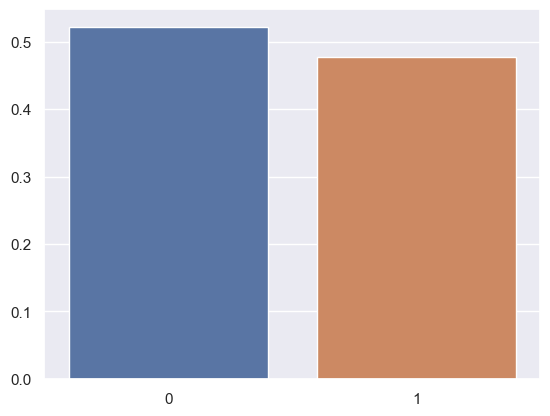

In [15]:
# Countplot y
sns.barplot(x=y.value_counts(normalize=True).index, y=y.value_counts(normalize=True).values)
print(f"\n Not Heart Disease: {round(y.value_counts(normalize=True)[0]*100,1)}, Heart Disease:{round(y.value_counts(normalize=True)[1]*100,1)}")

El target esta bastante balanceado con prevalencia de los pacientes con enfermedad cardiaca.

Nuestra Hipotesis nula va a ser del 48%

## 3.1 Analisis de variables categoricas

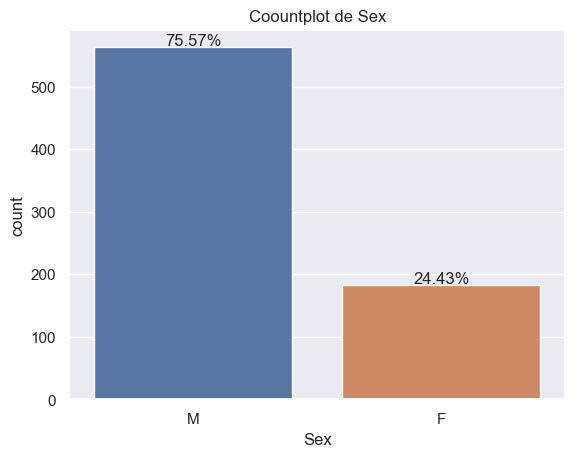

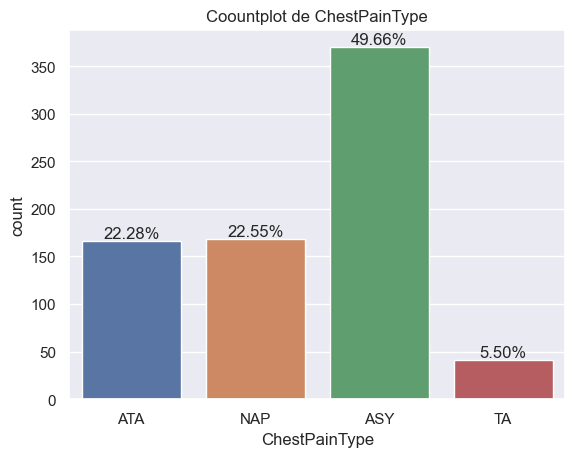

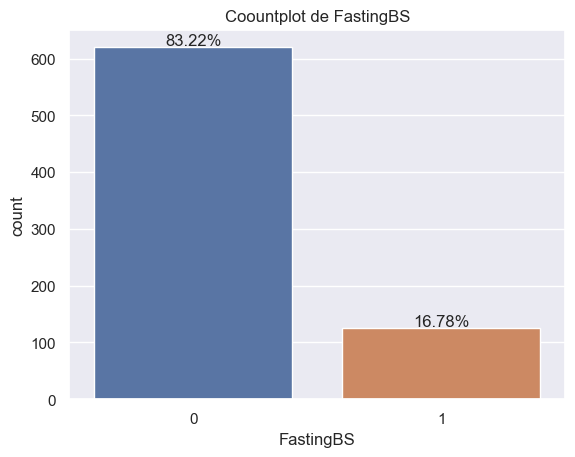

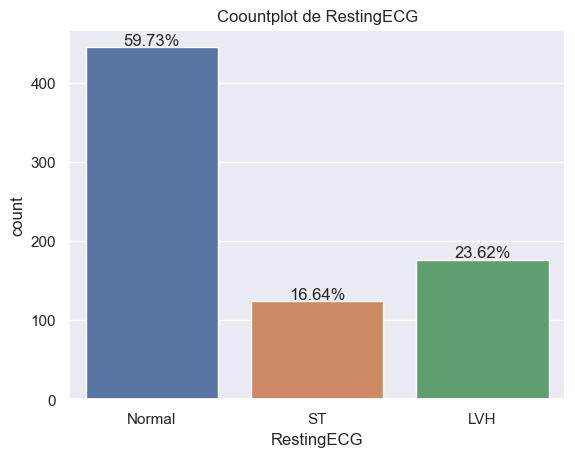

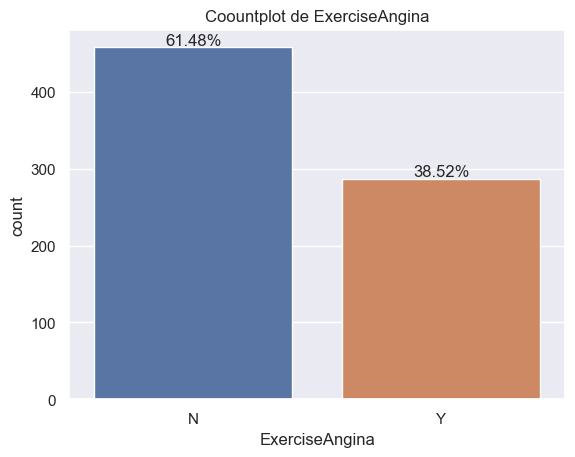

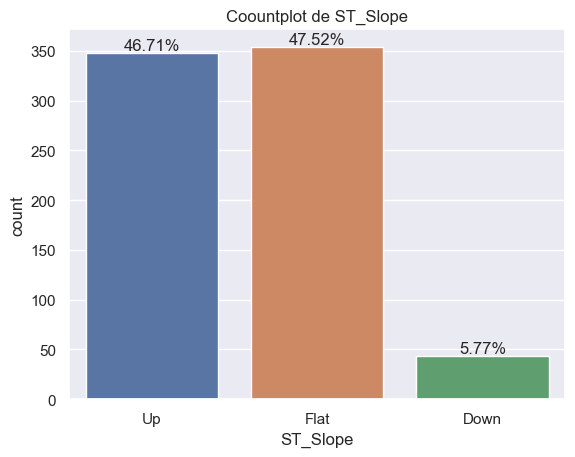

In [16]:
for var in categorical:
    counts = data[var].value_counts()
    total = counts.sum()
    plt.title(f"Coountplot de {var}")
    # Crear el countplot y mostrar el valor total en cada barra
    ax = sns.countplot(x=var, data=data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()

Analizando esta distribucion observamos:

- Sex: La mayoria son hombres (Casi un 75%)
- ChestPain Type: El tipo de dolor mas prevalente es el asintomatico (casi un 50%)
- FastingBS: La mayoria presenta niveles normales de glucemia en ayunas
- ECG Resting: El mas prevalente es el ECG Normal (casi un 60%)
- Excercise Angina: En un 60% fueron negativas
- ST_Slope: La pendiente del ST en su mayoria fue plano (47%), seguido de cerca por la elevacion del mismo (46%)

## 3.2 Analisis de varibles categoricas vs variable target (HeartDisease)

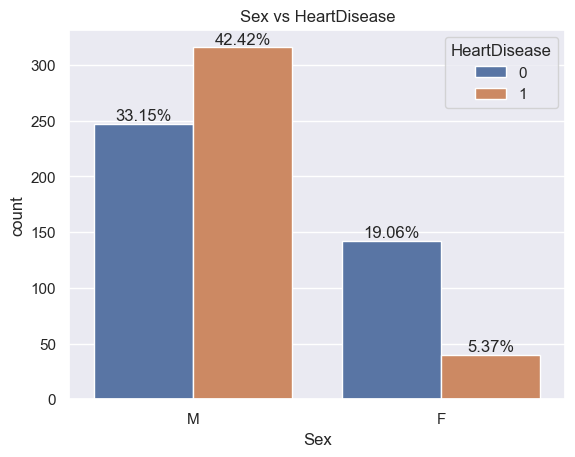

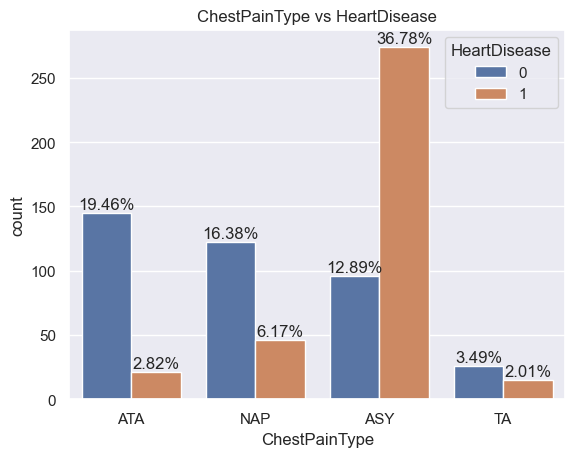

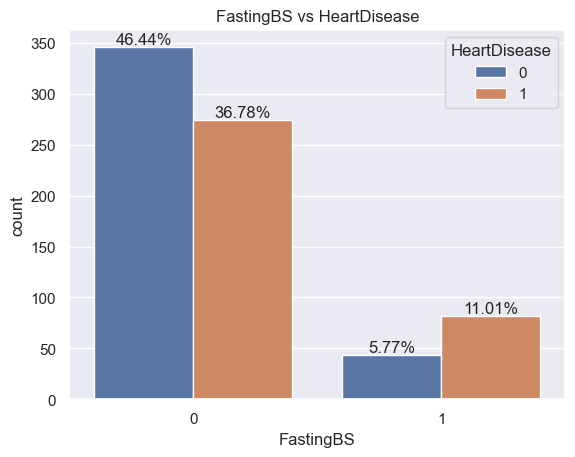

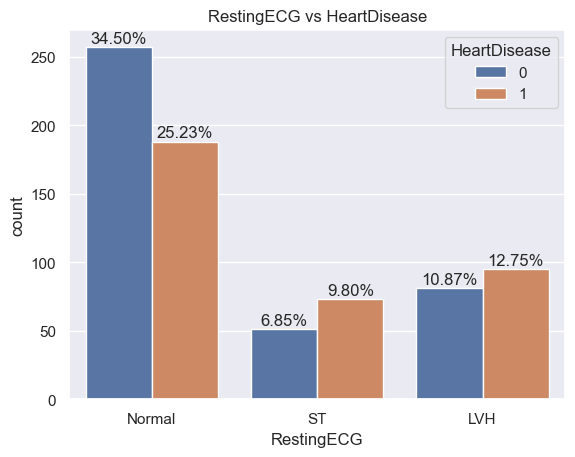

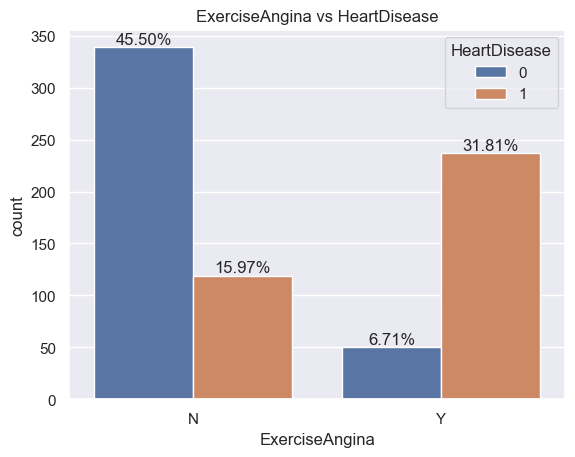

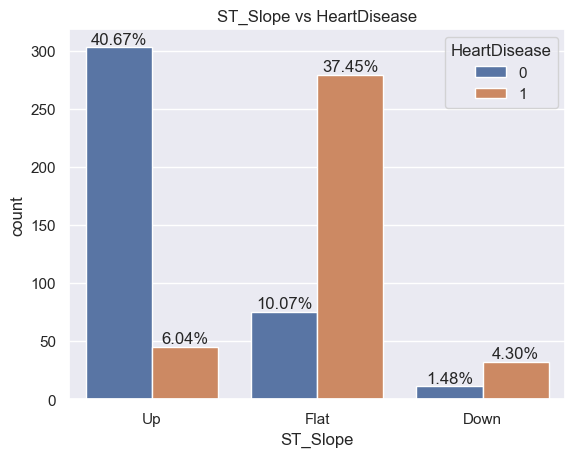

In [17]:
for var in categorical:
    counts = data[var].value_counts()
    total = counts.sum()
    plt.title(f"{var} vs HeartDisease")
    # Crear el countplot y mostrar el valor total en cada barra
    ax = sns.countplot(x=var, data=data, hue="HeartDisease")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()

La mayoria de los que tuvieron una afectacion cardiaca fueron los hombres. Es muy interesante observar que la mayoria de los pacientes que sufrieron la patologia cardiaca tuvieron ECG en reposo normal, pero cuando tuvieron alguna alteracion del ECG como alteraciones en el ST o signos de HT del ventriculo izquierdo la mayoria sufrio enfermedad del corazon. 

En relacion al dolor del pecho, donde se produjo la mayor cantidad de ocurrencias del target fue en los asintomaticos, concordante con la prevalencia de los totales. Importante observar que a pesar de que en el total de los asintomaticos la mayoria no tuvo una enfermedad cardiaca, la diferencia contra los que si la tuvieron no es tan amplia (35% vs 25%)

Otra observacion interesante es que la mayoria de los pacientes con enferdad cardiaca tuvieron ST plano. Y cunado hubo un descenso en el ST la mayoria fue positiva para el Target. 

Se observa que en los pacientes con Glucemia en ayunas alterado la proporcion de enfermedades cardiacas fue mayor.


## 3.3 Analisis de variables numericas

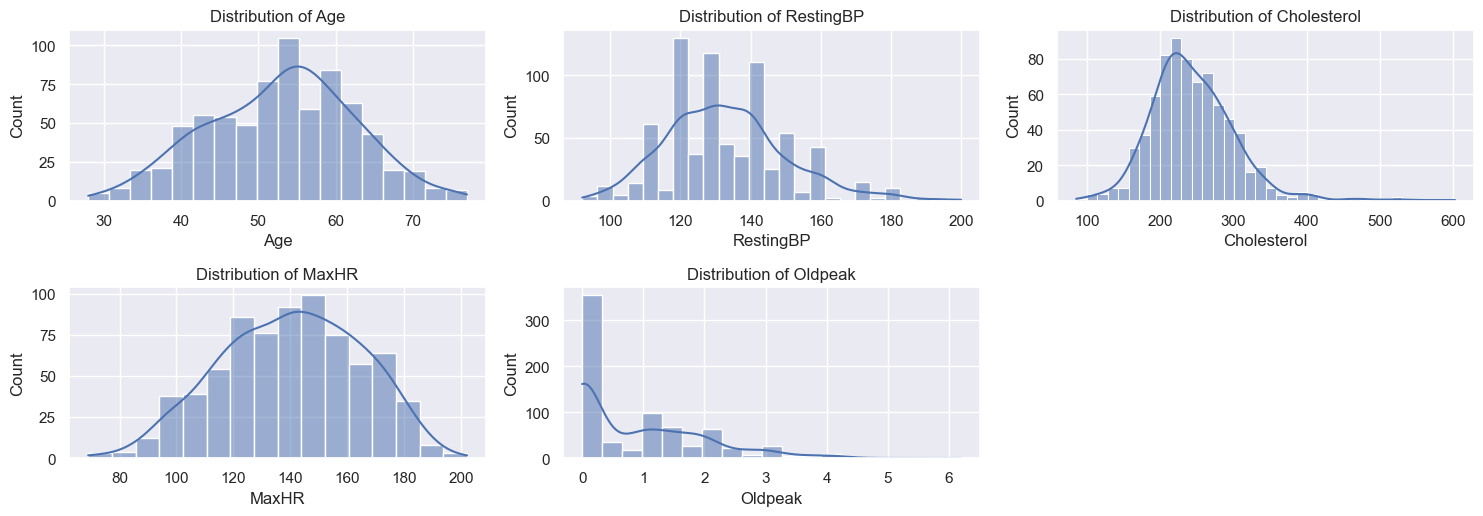

In [18]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

En relacion a la edad se observa que tiene una distribucion bastante normalizada, con su mayor concentracion entre los 50 y 60. MaxHR tambien tiene una distribucion normal

Colesterol y RestingBP tienen un sesgo a la derecha.

Oldpeak se observa una prevalencia en el 0, lo que es concordante con que la mayoria de los casos el ECG no tendria alteraciones en el ST cuando se realiza la prueba de ejercicio.

# 4. Analisis multivariable

## 4.1 Analisis entre variables numericas y categoricas en relacion al target

### Pairplot 

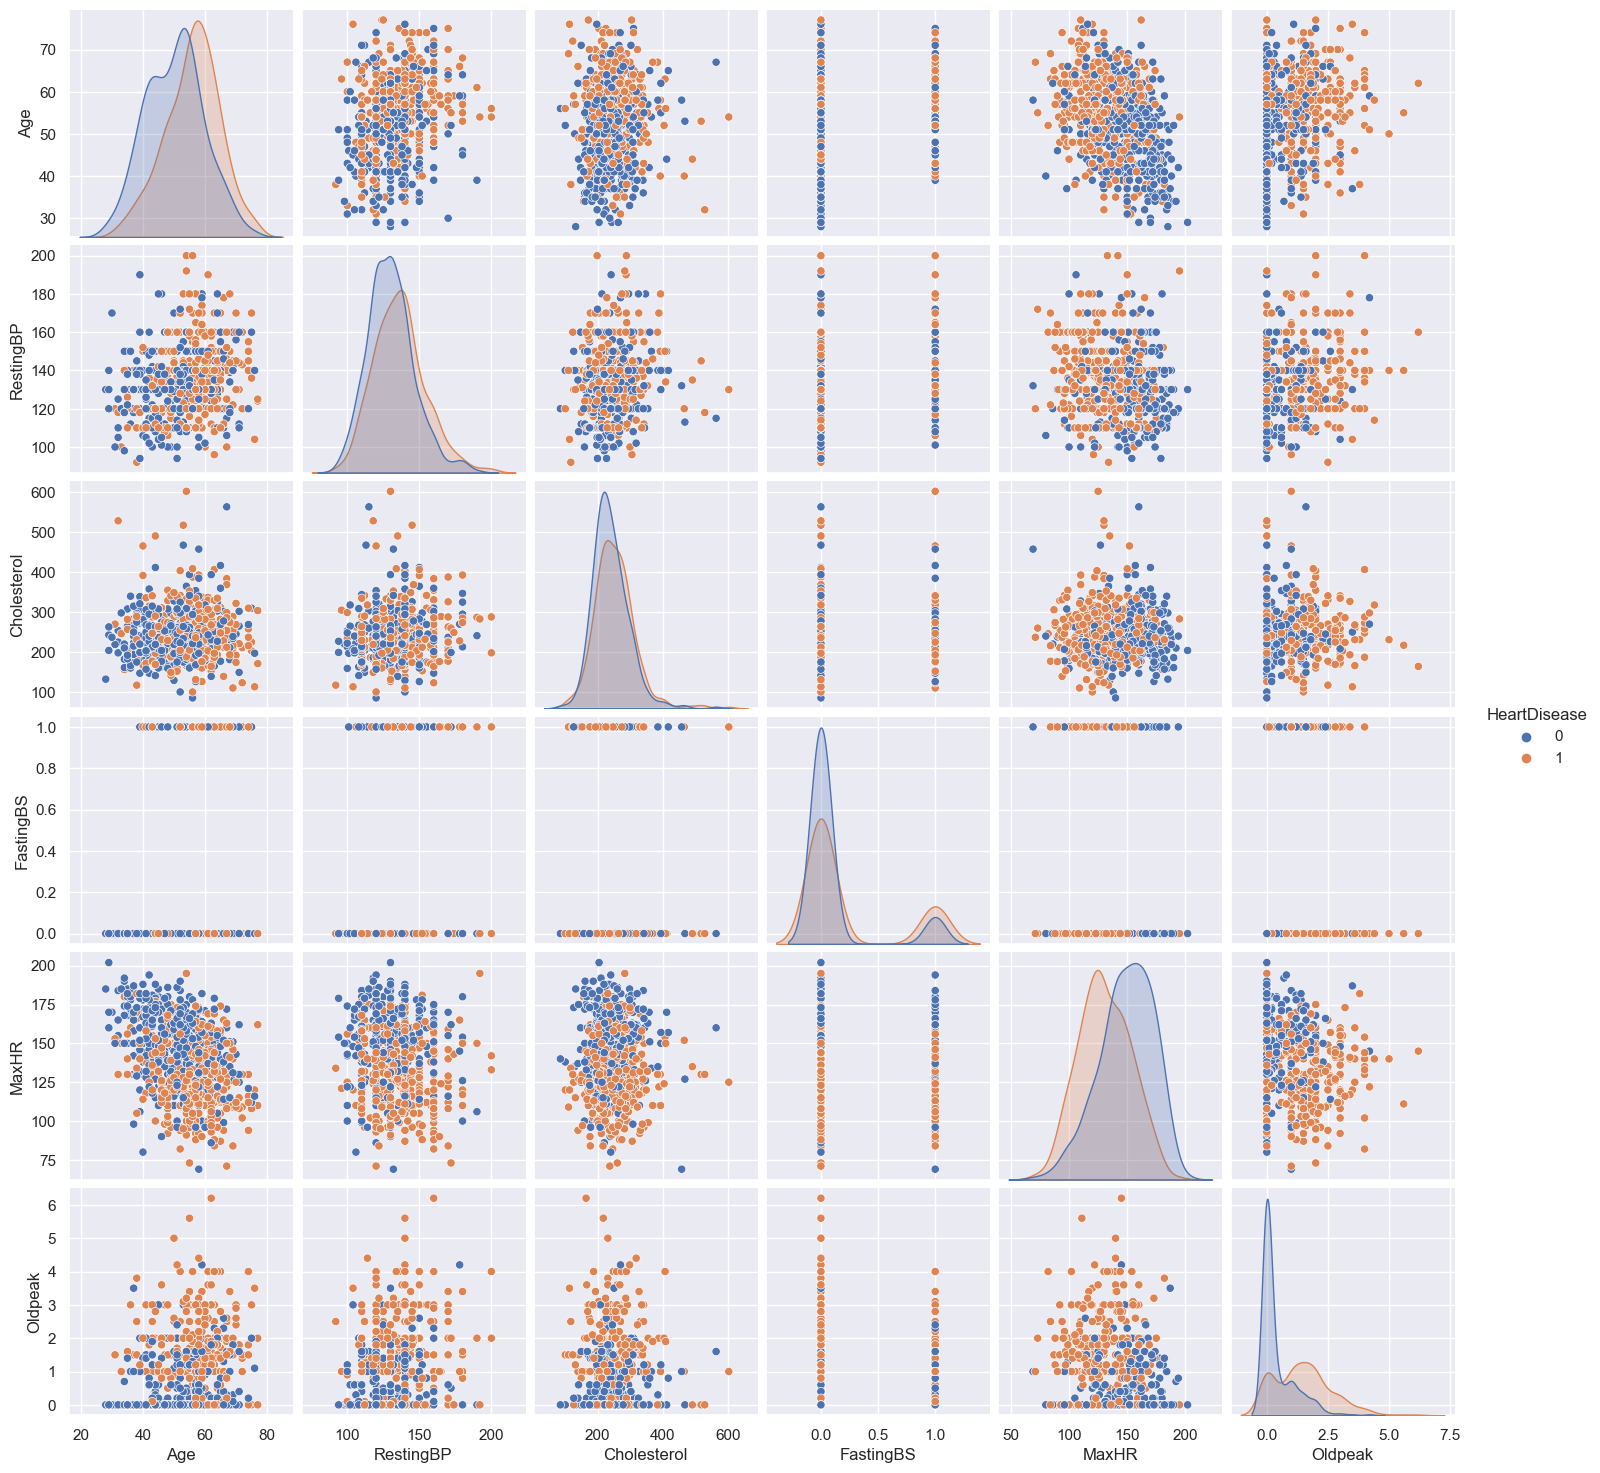

In [19]:
sns.pairplot(data, hue="HeartDisease")

Se observa una correlacion negativa entre la maxima frecuencia cardiaca (MaxHR) y la variables Age y RestingBP. Ademas mientras mas bajos son los valores de MaxHR mayor proprocion de pacientes con enfermedades cardiacas. En la variable Oldpeak los valores mas altos (>1.5) tienen una mayor proporcion de pacientes con enfermeda cardiaca.

## 4.2 Correlacion entre las variables

### Convertir variables a dummies para mejor analisis

In [20]:
X_eda = pd.get_dummies(data).drop(columns=["HeartDisease_0"])

### Matriz de correlacion

<AxesSubplot:>

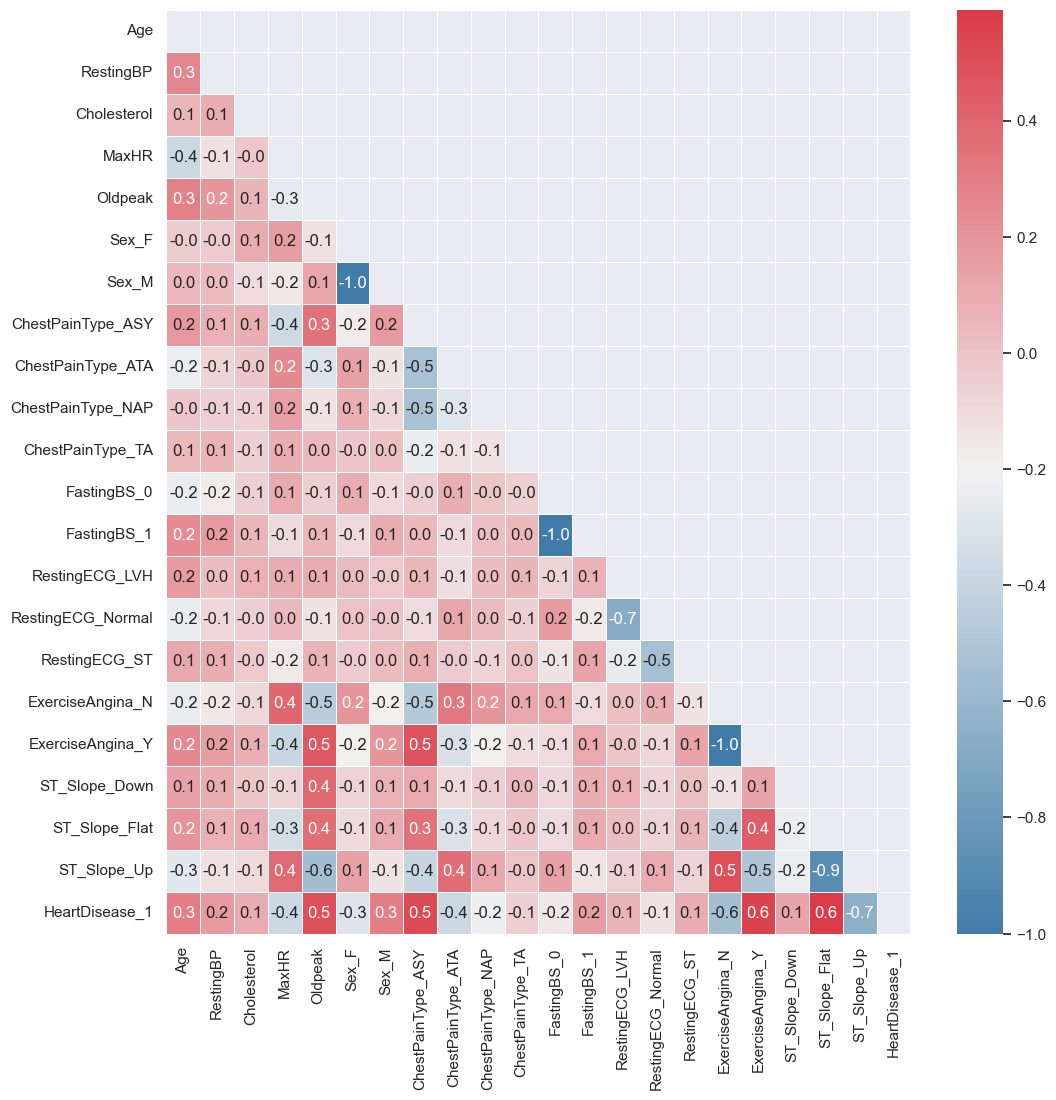

In [21]:
import seaborn as sns; sns.set_theme()
corr =X_eda.corr()
fig,ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap, mask=matrix)

Se observa como Oldpeak tiene una gran correlacion positiva con la angina inducida por el ejercicio y con el descenso del ST , con una correlacion negativa con la elevacion del mismo. 

Tambien se observa la relacion negativa previamente descripta entre edad y MaxHR. 

Ademas vemos correlacion positivas esperables entre alteraciones del ST y angina inducida por el ejercicio

### Correlacion entre el target y las variables

Text(0.5, 1.0, 'Correlation w.r.t HeartDisease')

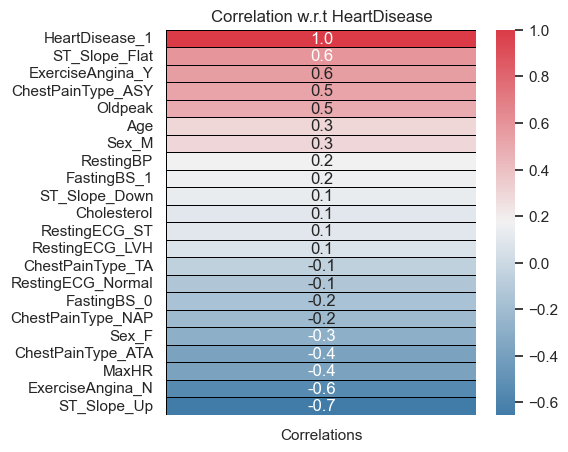

In [22]:
corr = X_eda.corrwith(X_eda['HeartDisease_1']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = cmap,linewidths = 0.4,linecolor = 'black', fmt= '.1f')
plt.title('Correlation w.r.t HeartDisease')

Se observa correlaciones positivas principalmente con ST plano, angina inducida en ejercicio, dolor de pecho asintomatico y un aumento en el oldpeak y una correlacion negativa principalmente con el descenso del ST, el maximo de la FC y angina atipica.

# 5. Machine learning

## 5.1 Feature Engineering


### Funcion para evaluar metricas

In [23]:
# Funcion para Scores

resultados_fin = pd.DataFrame()

def evaluacion(y_test, y_pred, model=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

    # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred)
    resultados['Sensitivity'] = round(sensibilidad,2)

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = round(accuracy,2)

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred)
    resultados['Precision'] = round(precision,2)

    # Calcular F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    resultados['F1_Score'] = round(f1_score,2)

    # Calcular AUC y graficar ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    resultados['AUC'] = round(auc,2)
    plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title(f'Matrix de Confusion {model}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])
    resultados_fin[model]= resultado_df 
    return resultados_fin.transpose().reset_index().rename(columns={"index": "Modelos"}).sort_values(by=["Accuracy"], ascending=False)

La metrica utilizada es el Acurracy ya que el target esta bastante balanceado. 

### Target dummy

In [24]:
y = pd.get_dummies(y, drop_first=True)

### Split Train and Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Transformar a variables dummy

In [26]:
from sklearn.preprocessing import OneHotEncoder 

def dummy_categoricas(categorias, dataframe1, dataframe2):    
        dataframe1_cat = dataframe1[categorias]
        dataframe2_cat = dataframe2[categorias]
        
        onehot = OneHotEncoder(drop = "first", handle_unknown='ignore')        
        X_enc_fit= onehot.fit_transform(dataframe1_cat).toarray()
        X_enc_trans= onehot.transform(dataframe2_cat).toarray()        
        
        enc_data_fit = pd.DataFrame(X_enc_fit, columns = onehot.get_feature_names_out())
        enc_data_trans = pd.DataFrame(X_enc_trans, columns = onehot.get_feature_names_out())
        
        dataframe1 = pd.concat([dataframe1.drop(columns=categorias).reset_index(drop=True), enc_data_fit], axis=1)
        dataframe2 = pd.concat([dataframe2.drop(columns=categorias).reset_index(drop=True), enc_data_trans], axis=1)
        
        return dataframe1, dataframe2 

In [27]:
# X_train y X_test

X_train, X_test = dummy_categoricas(categorical.columns, X_train, X_test)


### Escalar variables

In [28]:
# Lo usaremos para Logistic Regression

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test)

## 5.2 Modelos por Default

### Logistic Regression Default

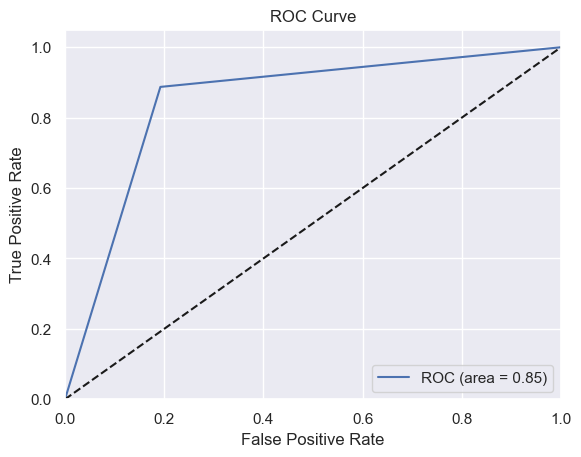

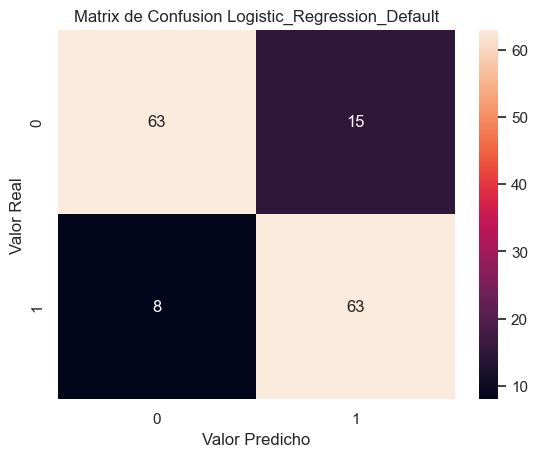

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85


In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)

clf_def = clf.fit(X_train_scaler, y_train)
y_pred_clf_def = clf_def.predict(X_test_scaler)
evaluacion(y_test, y_pred_clf_def, model="Logistic_Regression_Default")

### Random Forest Default

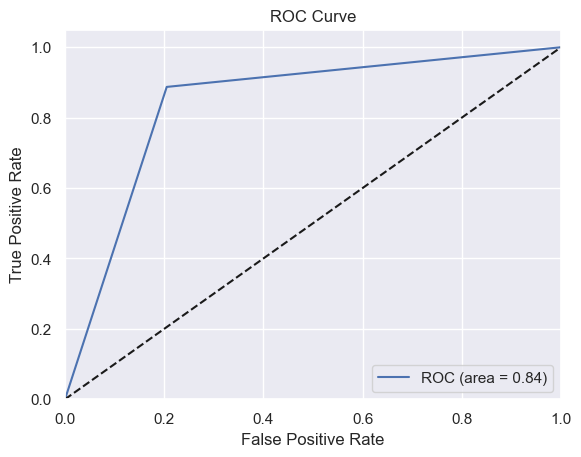

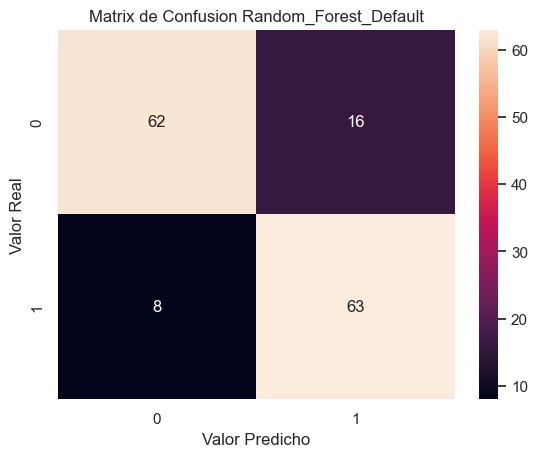

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf_def = rf.fit(X_train, y_train)
y_pred_rf_def = rf_def.predict(X_test)
evaluacion(y_test, y_pred_rf_def, model="Random_Forest_Default")

### XGBoost Default

[15:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


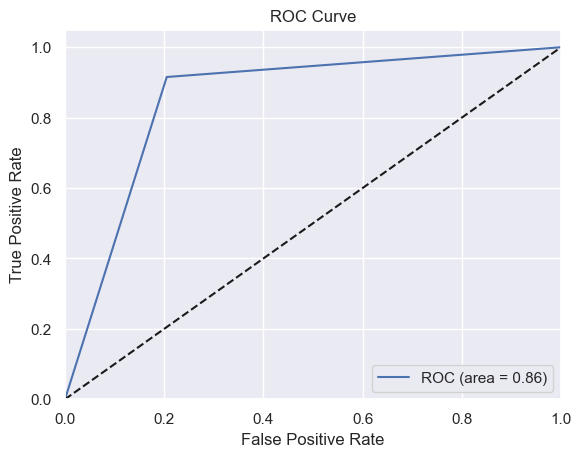

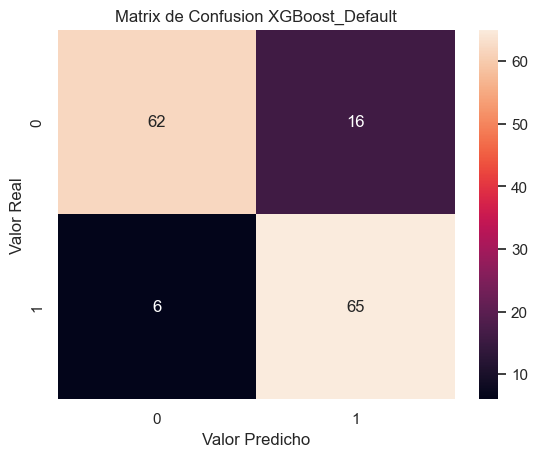

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84


In [31]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=1)
 
#Creating the model on Training Data
xgbc_def = xgbc.fit(X_train,y_train)
y_pred_xgb_def = xgbc_def.predict(X_test)
evaluacion(y_test, y_pred_xgb_def, model="XGBoost_Default")

## 5.3 Modelos con Optimizacion con Optuna

### Logistic Regression con Optuna

In [32]:
# Creo la funcion objetive donde voy a colocar los parametros a analizar
def objective(trial):
    
    param = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "tol": trial.suggest_float("tol", 0.0001, 0.01, log=True),
        "C":trial.suggest_float("C", 1.0, 10.0, log=True),
        "fit_intercept" :trial.suggest_categorical("fit_intercept", [True, False]),
        "solver" :trial.suggest_categorical("solver", ["liblinear", "saga"]),
        "multi_class": "auto"
        
    }    

    # Fit the model
    optuna_model = LogisticRegression(random_state=1,**param)
    optuna_model.fit(X_train_scaler, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_scaler)

    # Evaluate predictions
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Creo el studio donde se van a realziar las pruebas
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="Logistic_Regression",direction='maximize', sampler=sampler)

# Comienza el analisis
study.optimize(objective, n_trials=100)


In [33]:
# Imprimo los resultados

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8456375838926175
  Params: 
    penalty: l2
    tol: 0.00010005268542378313
    C: 2.0060075933840853
    fit_intercept: True
    solver: saga


In [34]:
# Utilizo los parametros seleccionados para entrenar y predecir

params = trial.params
clf = LogisticRegression(random_state=1,**params)
clf_opt = clf.fit(X_train_scaler, y_train)

# Prediccion
y_pred_clf_opt = clf_opt.predict(X_test_scaler)

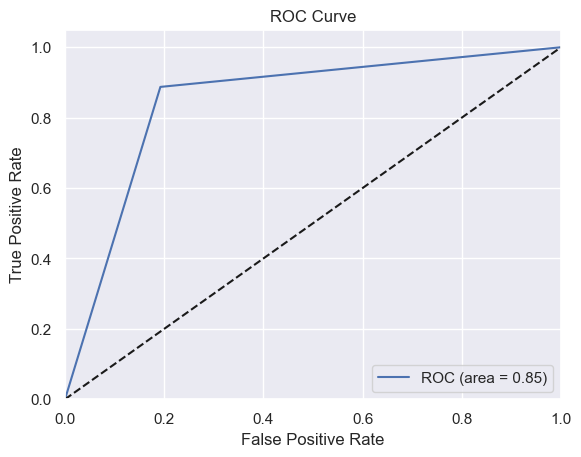

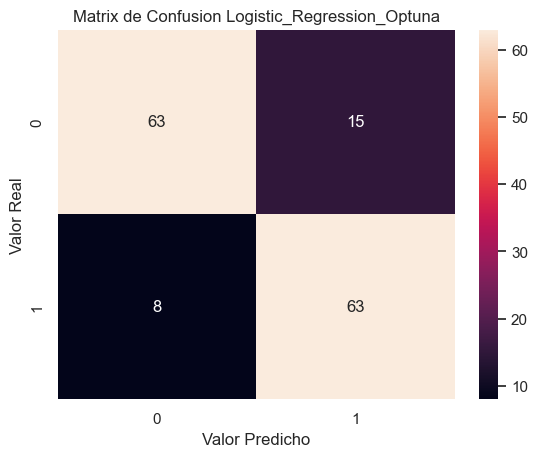

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84


In [35]:
# Evaluo
evaluacion(y_test, y_pred_clf_opt, model="Logistic_Regression_Optuna")

### Random Forest con Optuna

In [36]:
# Creo la funcion objetive donde voy a colocar los parametros a analizar
def objective(trial):
    
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 1, 200),
        "max_depth" : trial.suggest_int('max_depth', 1, 20),
        "min_samples_split" : trial.suggest_uniform('min_samples_split', 0.01, 0.5),
        "min_samples_leaf" : trial.suggest_uniform('min_samples_leaf', 0.01, 0.5),
        "criterion" : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        "max_features" : trial.suggest_categorical('max_features', ['auto', 'log2']),
        "bootstrap" : trial.suggest_categorical("bootstrap", [True, False])
        
    }    

    # Fit the model
    optuna_model = RandomForestClassifier(random_state=1,**param)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Creo el studio donde se van a realziar las pruebas
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="Random_Forest",direction='maximize', sampler=sampler)

# Comienza el analisis
study.optimize(objective, n_trials=100)

In [37]:
# Imprimo los resultados

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8389261744966443
  Params: 
    n_estimators: 63
    max_depth: 4
    min_samples_split: 0.46095609399068993
    min_samples_leaf: 0.29159671024630757
    criterion: gini
    max_features: log2
    bootstrap: True


In [38]:
# Utilizo los parametros seleccionados para entrenar y predecir

params = trial.params
rf = RandomForestClassifier(random_state=1,**params)
rf_opt = rf.fit(X_train, y_train)

# Prediccion

y_pred_rf_opt = rf_opt.predict(X_test)

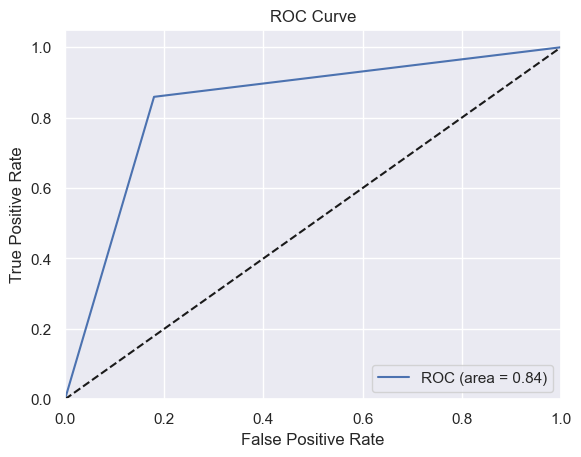

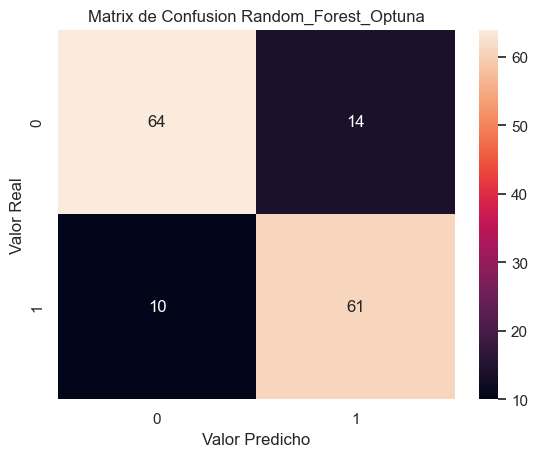

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84
4,Random_Forest_Optuna,0.86,0.84,0.81,0.84,0.84


In [39]:
# Evaluo
evaluacion(y_test, y_pred_rf_opt, model="Random_Forest_Optuna")

### XGBoost con Optuna

Realizo mismo procedimiento apra XGBoost

In [40]:
def objective(trial):   

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Fit the model
    optuna_model = XGBClassifier(random_state=1,**param)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(study_name="XGBoost", direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

In [41]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8926174496644296
  Params: 
    booster: dart
    lambda: 0.010267779163655703
    alpha: 0.002680812715256411
    subsample: 0.9903550846657221
    colsample_bytree: 0.33965528166471143
    max_depth: 9
    min_child_weight: 2
    eta: 0.6545242156220253
    gamma: 1.0473210119107743e-08
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: tree
    rate_drop: 0.0003218343166048224
    skip_drop: 0.00035215277087965763


In [42]:
params = trial.params
xgbc = XGBClassifier(random_state=1,**params)
xgbc_opt = xgbc.fit(X_train, y_train)

# Prediccion

y_pred_xgb_opt = xgbc_opt.predict(X_test)

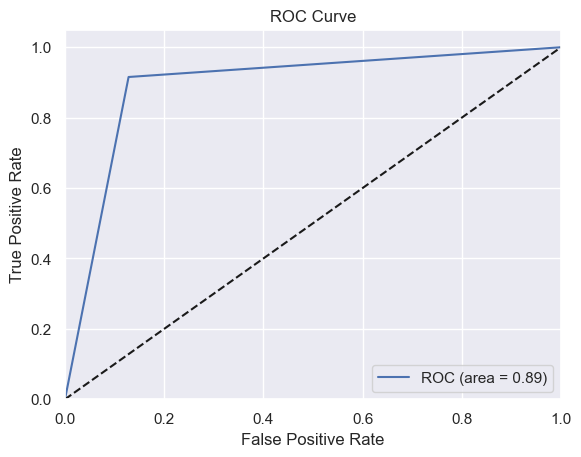

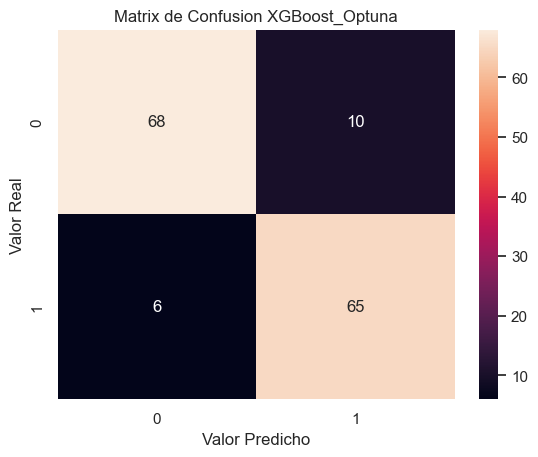

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
5,XGBoost_Optuna,0.92,0.89,0.87,0.89,0.89
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84
4,Random_Forest_Optuna,0.86,0.84,0.81,0.84,0.84


In [43]:
evaluacion(y_test, y_pred_xgb_opt, model="XGBoost_Optuna")

## 5.4 Modelos eligiendo Features segun su importancia

### Logistic Regression

Busco cuales features son las que influyen en el modelo tomando como determinante un valor p menor a 0.05

In [44]:
# Creo funcion para que me devuelva un dataframe con las variables con un valor menor a 0.05

import statsmodels.api as sm

# Funcion

# OLS - Stats models
def ols_sumary(X_train, y_train, model):
    # Agregamos constante
    X_constant = sm.add_constant(X_train)

    # Fitiamos
    model_sm = sm.OLS(y_train,X_constant).fit()
    display(model_sm.summary())

    # Creamos diccionario para agregar los p-value
    d = {}
    for x in X_constant.columns.tolist():
        d[f'{x}'] = model_sm.pvalues[x]

    # Creamos dataframe y filtramos con las p-value mayores a 0.05
    df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value', ascending=False).reset_index(drop=True)
    print("-" *30)
    print("TABLA P-VALUE MAYOR A 0.05")
    print("-" *30)
    display (df_pvalue[df_pvalue["p-Value"] > 0.05])
    return (df_pvalue[df_pvalue["p-Value"] > 0.05])

In [45]:
# Convierto a dataframe el array de los valores escalados
scaled_df_train = pd.DataFrame(X_train_scaler, columns=X_train.columns, index=X_train.index)
scaled_df_test = pd.DataFrame(X_test_scaler, columns=X_test.columns, index=X_test.index)
y_train_clean = y_train.reset_index(drop=True)



In [46]:
# Utilizo funcion
list_p_values = ols_sumary(scaled_df_train, y_train_clean, clf)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     54.58
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          2.50e-100
Time:                        15:52:24   Log-Likelihood:                -169.68
No. Observations:                 596   AIC:                             371.4
Df Residuals:                     580   BIC:                             441.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4782      0.013     35.802      0.000       0.452       0.504
Age                   0.0339      0.016      2.131      0.034       0.003       0.065
RestingBP             0.0268      0.014      1.896      0.059      -0.001       0.055
Cholesterol           0.0309      0.014      2.242      0.025       0.004       0.058
MaxHR                -0.0082      0.016     -0.509      0.611      -0.040       0.024
Oldpeak               0.0396      0.018      2.196      0.029       0.004       0.075
Sex_M                 0.0742      0.014      5.313      0.000       0.047       0.102
ChestPainType_ATA    -0.0818      0.017     -4.918      0.000      -0.114      -0.049
ChestPainType_NAP    -0.0802      0.016     -5.160      0.000      -0.111      -0.050
ChestPainType_TA     -0.0286      0.014     -2.009      0.045      -0.057      -0.001
FastingBS_1           0.0129      0.014      0.910      0.363      -0.015       0.041
RestingECG_Normal    -0.0122      0.017     -0.720      0.472      -0.046       0.021
RestingECG_ST        -0.0077      0.017     -0.467      0.641      -0.040       0.025
ExerciseAngina_Y      0.0677      0.018      3.836      0.000       0.033       0.102
ST_Slope_Flat         0.0623      0.032      1.977      0.048       0.000       0.124
ST_Slope_Up          -0.1561      0.035     -4.400      0.000      -0.226      -0.086
==============================================================================
Omnibus:                       23.373   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.888
Skew:                          -0.298   Prob(JB):                     5.92e-09
Kurtosis:                       4.082   Cond. No.                         6.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------------------
TABLA P-VALUE MAYOR A 0.05
------------------------------


,Var_name,p-Value
0,RestingECG_ST,0.640569
1,MaxHR,0.610787
2,RestingECG_Normal,0.471788
3,FastingBS_1,0.363162
4,RestingBP,0.058521


In [47]:
X_train_scaler_clean = scaled_df_train.drop(columns=list_p_values["Var_name"].values)
X_test_scaler_clean = scaled_df_test.drop(columns=list_p_values["Var_name"].values)

Realizamos el modelo

In [48]:
# Creo la funcion objetive donde voy a colocar los parametros a analizar
def objective(trial):
    
    param = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "tol": trial.suggest_float("tol", 0.0001, 0.01, log=True),
        "C":trial.suggest_float("C", 1.0, 10.0, log=True),
        "fit_intercept" :trial.suggest_categorical("fit_intercept", [True, False]),
        "solver" :trial.suggest_categorical("solver", ["liblinear", "saga"]),
        "multi_class": "auto"
        
    }    

    # Fit the model
    optuna_model = LogisticRegression(random_state=1,**param)
    optuna_model.fit(X_train_scaler_clean, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_scaler_clean)

    # Evaluate predictions
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Creo el studio donde se van a realziar las pruebas
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="Logistic_Regression_Clean",direction='maximize', sampler=sampler)

# Comienza el analisis
study.optimize(objective, n_trials=100)


In [49]:
# Imprimo los resultados

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8523489932885906
  Params: 
    penalty: l2
    tol: 0.00010005268542378313
    C: 2.0060075933840853
    fit_intercept: True
    solver: saga


In [50]:
# Utilizo los parametros seleccionados para entrenar y predecir

params = trial.params
clf = LogisticRegression(random_state=1,**params)
clf_opt = clf.fit(X_train_scaler_clean, y_train)

# Prediccion
y_pred_clf_opt = clf_opt.predict(X_test_scaler_clean)

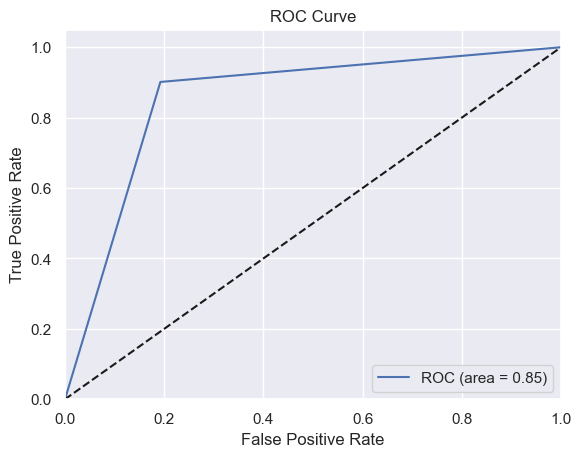

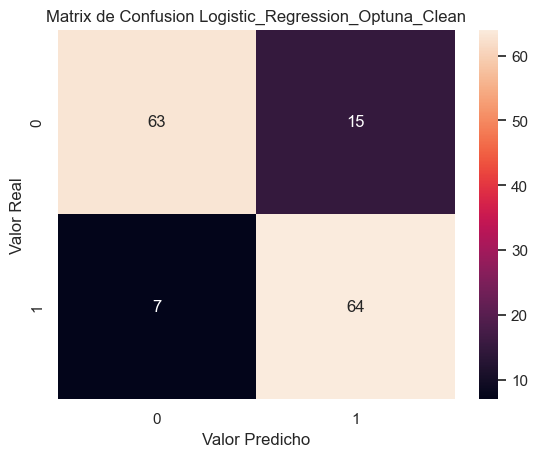

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
5,XGBoost_Optuna,0.92,0.89,0.87,0.89,0.89
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
6,Logistic_Regression_Optuna_Clean,0.90,0.85,0.81,0.85,0.85
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84
4,Random_Forest_Optuna,0.86,0.84,0.81,0.84,0.84


In [51]:
# Evaluo
evaluacion(y_test, y_pred_clf_opt, model="Logistic_Regression_Optuna_Clean")

### Random Forest

[0.18867925 0.0754717  0.0754717  0.20754717 0.24528302 0.
 0.         0.         0.         0.         0.         0.
 0.         0.13207547 0.0754717 ]


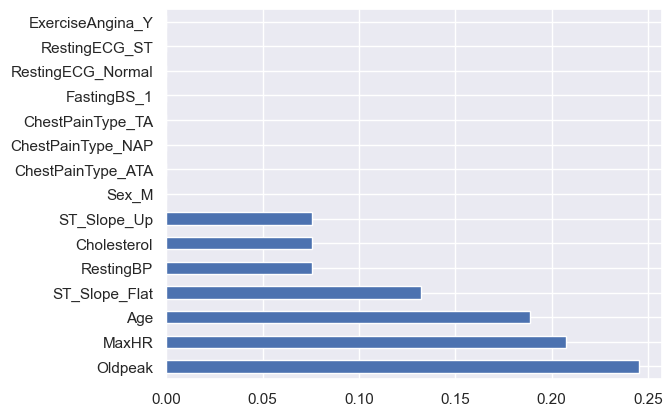

In [52]:
# Observo las feature importance

import matplotlib.pyplot as plt

print(rf_opt.feature_importances_) 

feat_importances = pd.Series(rf_opt.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
top_features_rf = feat_importances.sort_values(ascending=False)[:5]
print(top_features_rf.index)

Index(['Oldpeak', 'MaxHR', 'Age', 'ST_Slope_Flat', 'RestingBP'], dtype='object')


Realizo modelo

In [54]:
# Creo la funcion objetive donde voy a colocar los parametros a analizar
def objective(trial):
    
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 1, 200),
        "max_depth" : trial.suggest_int('max_depth', 1, 20),
        "min_samples_split" : trial.suggest_uniform('min_samples_split', 0.01, 0.5),
        "min_samples_leaf" : trial.suggest_uniform('min_samples_leaf', 0.01, 0.5),
        "criterion" : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        "max_features" : trial.suggest_categorical('max_features', ['auto', 'log2']),
        "bootstrap" : trial.suggest_categorical("bootstrap", [True, False])
        
    }    

    # Fit the model
    optuna_model = RandomForestClassifier(random_state=1,**param)
    optuna_model.fit(X_train[top_features_rf.index], y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test[top_features_rf.index])

    # Evaluate predictions    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

# Creo el studio donde se van a realziar las pruebas
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="Random_Forest_Clean",direction='maximize', sampler=sampler)

# Comienza el analisis
study.optimize(objective, n_trials=100)

In [55]:
# Imprimo los resultados

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8456375838926175
  Params: 
    n_estimators: 8
    max_depth: 5
    min_samples_split: 0.32307648816996326
    min_samples_leaf: 0.4559839164268656
    criterion: gini
    max_features: auto
    bootstrap: False


In [56]:
# Utilizo los parametros seleccionados para entrenar y predecir

params = trial.params
rf = RandomForestClassifier(random_state=1,**params)
rf_opt = rf.fit(X_train[top_features_rf.index], y_train)

# Prediccion

y_pred_rf_opt = rf_opt.predict(X_test[top_features_rf.index])

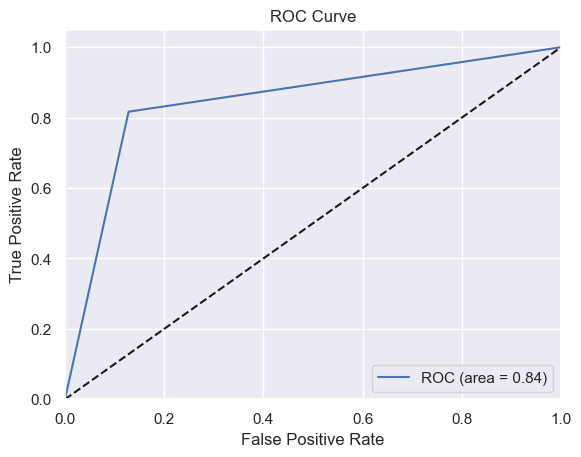

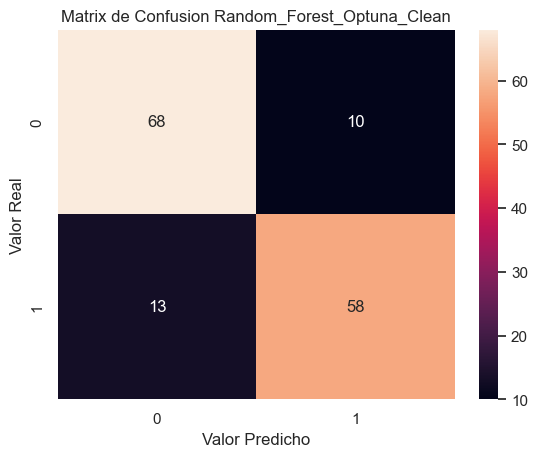

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
5,XGBoost_Optuna,0.92,0.89,0.87,0.89,0.89
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
6,Logistic_Regression_Optuna_Clean,0.90,0.85,0.81,0.85,0.85
7,Random_Forest_Optuna_Clean,0.82,0.85,0.85,0.83,0.84
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84
4,Random_Forest_Optuna,0.86,0.84,0.81,0.84,0.84


In [57]:
# Evaluo
evaluacion(y_test, y_pred_rf_opt, model="Random_Forest_Optuna_Clean")

### XGBoost

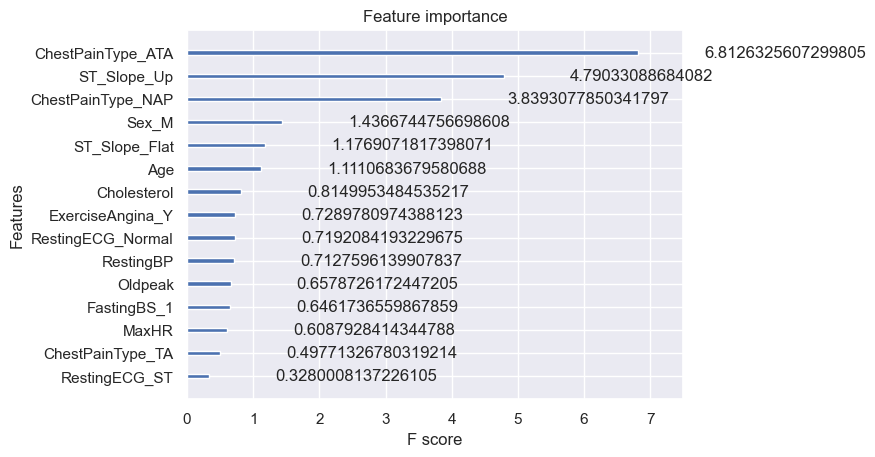

In [58]:
# Feature importance 

from xgboost import plot_importance
plot_importance(xgbc_opt, importance_type="gain")
plt.show()

In [59]:
# Obtener importancia de características
importance = xgbc_opt.get_booster().get_score(importance_type='gain')

# Ordenar características de manera decreciente
importance = {k: v for k, v in sorted(importance.items(), key=lambda item: item[1], reverse=True)}

# Seleccionar las características más importantes
top_features_xgb = list(importance.keys())[:5]

print(top_features_xgb)


['ChestPainType_ATA', 'ST_Slope_Up', 'ChestPainType_NAP', 'Sex_M', 'ST_Slope_Flat']


In [60]:
def objective(trial):   

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Fit the model
    optuna_model = XGBClassifier(random_state=1,**param)
    optuna_model.fit(X_train[top_features_xgb], y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test[top_features_xgb])

    # Evaluate predictions
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(study_name="XGBoost_Clean", direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

In [61]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8187919463087249
  Params: 
    booster: gblinear
    lambda: 0.0005595659320754029
    alpha: 2.9472080307675245e-05
    subsample: 0.8458884231078732
    colsample_bytree: 0.4521958424762984


In [62]:
params = trial.params
xgbc = XGBClassifier(random_state=1,**params)
xgbc_opt = xgbc.fit(X_train[top_features_xgb], y_train)

# Prediccion

y_pred_xgb_opt = xgbc_opt.predict(X_test[top_features_xgb])

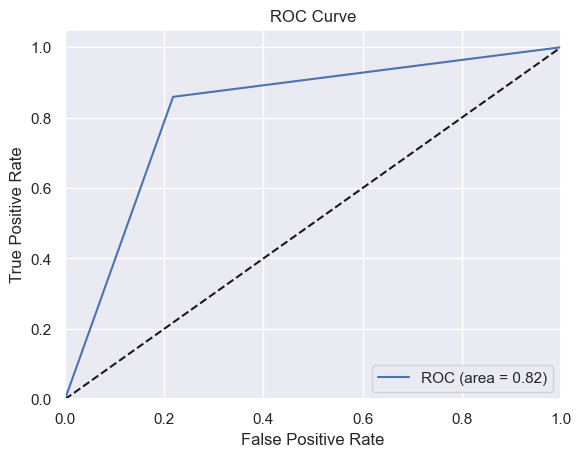

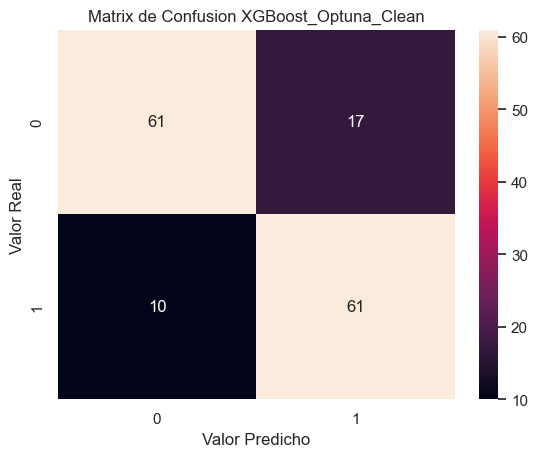

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
5,XGBoost_Optuna,0.92,0.89,0.87,0.89,0.89
0,Logistic_Regression_Default,0.89,0.85,0.81,0.85,0.85
2,XGBoost_Default,0.92,0.85,0.80,0.86,0.86
3,Logistic_Regression_Optuna,0.89,0.85,0.81,0.85,0.85
6,Logistic_Regression_Optuna_Clean,0.90,0.85,0.81,0.85,0.85
7,Random_Forest_Optuna_Clean,0.82,0.85,0.85,0.83,0.84
1,Random_Forest_Default,0.89,0.84,0.80,0.84,0.84
4,Random_Forest_Optuna,0.86,0.84,0.81,0.84,0.84
8,XGBoost_Optuna_Clean,0.86,0.82,0.78,0.82,0.82


In [63]:
evaluacion(y_test, y_pred_xgb_opt, model="XGBoost_Optuna_Clean")

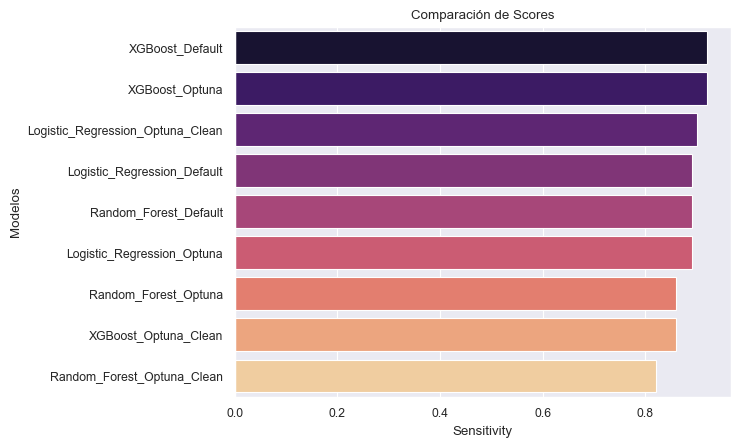

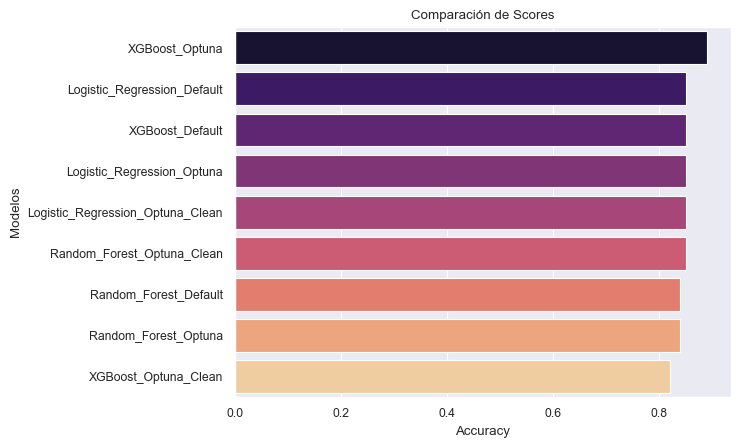

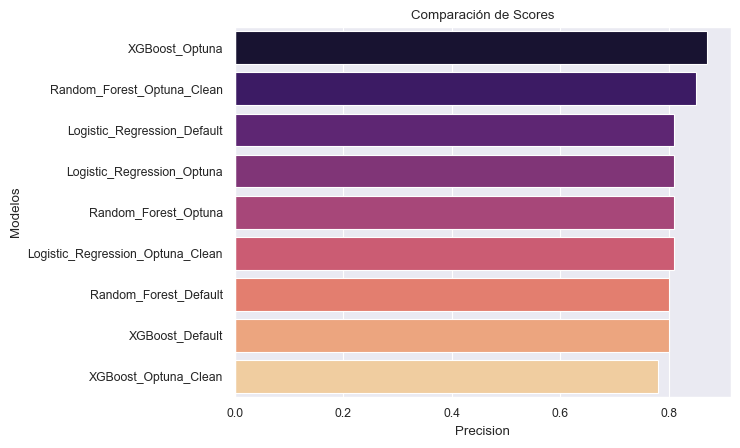

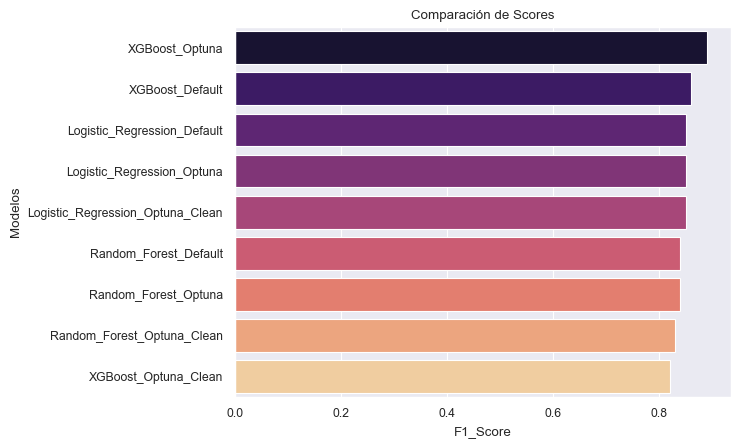

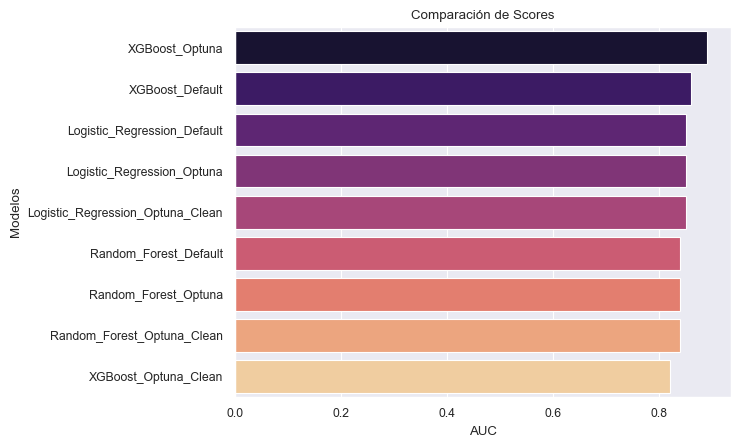

In [64]:
resultados_fin = resultados_fin.transpose().reset_index().rename(columns={"index": "Modelos"})
scores_columns= ["Sensitivity","Accuracy", "Precision", "F1_Score", "AUC"]

for scores in scores_columns:
    sns.set_context('paper')
    ax = sns.barplot(x =resultados_fin[scores] ,y = "Modelos" ,data = resultados_fin.sort_values(by=scores, ascending=False), palette = 'magma')
    ax.set(xlabel=scores, ylabel="Modelos", title="Comparación de Scores")
    plt.show()

# 7. Conclusion

El mejor modelo fue XGboost con la optimizacion de sus hiperparametros, con un accurracy del casi 90% y una sensibilidad del 92% lo cual lo hace muy interesante. Superando ampliamente la hipotesis nula (48%).

Al utilizar Optana logramos una busqueda de varios hiperparametros en pocos minutos, lo que facilita la realizacion y mejora el rendimiento de manera exponencial. 

Al observar cuales fueron las variables a la que le dio mayor importancia hubo una discordancia entre XBGboost y RandomForest. Este ultimo priorizo a Oldpeak y a MaxHR como sus variables de mayor importancia, mientras que XGboost priorizo a la Angina atipica y la elevacion del ST.

La seleccion de las 5 principales caracteristicas en el modelo de RandomForest tuvo una leve mejoria mientras que en XGBoost empeoró su rendimiento. Con Logistic Regression la eliminacion de las variables con un p-value mayor a 0.05 no tuvo cambios.

Como conclusion se pudo lograr un gran rendimiento con los 3 modelos ademas de utilizar a Optana como poder agilizar y facilitar la busqueda de hiperparametros. Basadonos en la importancia de las variables que determino el mejor modelo (XGBoost) queda claro que las principales variables son los sintomas y alteraciones del ECG.